# Can we Predict Loneliness?

## Importing Packages

In [109]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


## Load Files

In [2]:

file_path = "C:\\Users\\medasud\\Downloads\\DSDP Project 2 Loneliness\\covidpanel_us_stata_jan_17_2023.dta"
coviddata = pd.read_stata(file_path)

print(coviddata.head())

       uasid    uashhid survhhid  wave  survey_source  final_weight  \
0  140100007  140100007       .n   1.0          230.0      2.757085   
1  140100010  140100010       .n   1.0          230.0      0.881547   
2  140100011  140100011       .n   1.0          230.0      2.791393   
3  140100035  140100035       .n   1.0          230.0      1.087637   
4  140100038  140100038       .n   1.0          230.0      2.889530   

  uasmembers                   sampletype                    batch  \
0        0.0  1 Nationally Representative  1 ASDE 2014/01 Nat.Rep.   
1        0.0  1 Nationally Representative  1 ASDE 2014/01 Nat.Rep.   
2        0.0  1 Nationally Representative  1 ASDE 2014/01 Nat.Rep.   
3        0.0  1 Nationally Representative  1 ASDE 2014/01 Nat.Rep.   
4        0.0  1 Nationally Representative  1 ASDE 2014/01 Nat.Rep.   

     primary_respondent  ... vc004d vc005_randomizer vc005a  vc005b  vc005c  \
0  1 Primary respondent  ...    NaN              NaN    NaN     NaN     N

In [4]:
coviddata.shape

(208825, 4222)

In [256]:
#create a copy of the dataframe for analysis
newdf = coviddata.copy()

In [257]:
#this is the variable for loneliness in response to 'how often have you felt lonely?'
newdf['cr058'].value_counts()

cr058
1 Not at all or less than 1 day    109047
2 1-2 days                          27236
3 3-4 days                          12038
4 5-7 days                           9969
Name: count, dtype: int64

In [258]:
newdf['cr058'] = newdf['cr058'].astype(str).str.strip()

#rename values
newdf.loc[newdf['cr058'] == '1 Not at all or less than 1 day', 'cr058'] = 'Not at all or less than 1 day'
newdf.loc[newdf['cr058'] == '2 1-2 days', 'cr058'] = '1-2 days'
newdf.loc[newdf['cr058'] == '3 3-4 days', 'cr058'] = '3-4 days'
newdf.loc[newdf['cr058'] == '4 5-7 days', 'cr058'] = '5-7 days'

In [259]:
newdf['race'].value_counts()

race
1 White Only                               162365
2 Black Only                                17012
4 Asian Only                                11229
6 Mixed                                     10969
3 American Indian or Alaska Native Only      4343
5 Hawaiian/Pacific Islander Only             1408
Name: count, dtype: int64

## Creating/Modifying Variables

### Race

In [260]:
columns_to_view = ['race', 'hisplatino', 'hisplatino_group', 'asian', 'pacific', 'nativeamer', 'black', 'white']

#select the columns for race and view them
selected_columns_df = newdf[columns_to_view]
print(selected_columns_df.tail(10))

                race hisplatino hisplatino_group  asian pacific nativeamer  \
208815       6 Mixed       0 No              NaN  1 Yes    0 No       0 No   
208816  1 White Only       0 No              NaN   0 No    0 No       0 No   
208817  4 Asian Only       0 No              NaN  1 Yes    0 No       0 No   
208818  4 Asian Only       0 No              NaN  1 Yes    0 No       0 No   
208819  1 White Only       0 No              NaN   0 No    0 No       0 No   
208820  2 Black Only       0 No              NaN   0 No    0 No       0 No   
208821  1 White Only      1 Yes        1 Mexican   0 No    0 No       0 No   
208822       6 Mixed       0 No              NaN  1 Yes    0 No      1 Yes   
208823  2 Black Only       0 No              NaN   0 No    0 No       0 No   
208824  1 White Only       0 No              NaN   0 No    0 No       0 No   

        black  white  
208815  1 Yes   0 No  
208816   0 No  1 Yes  
208817   0 No   0 No  
208818   0 No   0 No  
208819   0 No  1 Yes  
208

In [261]:
#the 'race' column did not have any category for hispanic/latino. All records in 'hisplatino' with 
#value '1 Yes' had value '1 White Only' in race, so we represent this group in 'race_combined'

#convert columns to string to avoid categorical issues
newdf['race'] = newdf['race'].astype(str)
newdf['hisplatino'] = newdf['hisplatino'].astype(str)

#create a new column race_combined and initially copy the values from race
newdf['race_combined'] = newdf['race'].astype(str)

condition = (newdf['race'] == '1 White Only') & (newdf['hisplatino'] == '1 Yes')
newdf.loc[condition, 'race_combined'] = newdf.loc[condition, 'hisplatino']

#identify rows where race is missing. This is mostly for hispanic/latino individuals as the 'race' column
#does not record that ethnic group, or they are classed as '1 White Only'
missing_race = newdf['race'].isnull() | (newdf['race'] == '1 White Only')
#we want to select values where they are hisp/lat
hisplatino_yes = newdf['hisplatino'] == '1 Yes'
#combine the above conditions
condition = missing_race & hisplatino_yes

#update race_combined based on hisplatino for rows matching the condition
newdf.loc[condition, 'race_combined'] = newdf.loc[condition, 'hisplatino']


In [262]:
newdf['race_combined'] = newdf['race_combined'].astype(str).str.strip()

#rename values
newdf.loc[newdf['race_combined'] == '1 Yes', 'race_combined'] = 'Hispanic/Latino'
newdf.loc[newdf['race_combined'] == '1 White Only', 'race_combined'] = 'White Only'
newdf.loc[newdf['race_combined'] == '2 Black Only', 'race_combined'] = 'Black Only'
newdf.loc[newdf['race_combined'] == '3 American Indian or Alaska Native Only', 'race_combined'] = 'American Indian or Alaska Native Only'
newdf.loc[newdf['race_combined'] == '4 Asian Only', 'race_combined'] = 'Asian Only'
newdf.loc[newdf['race_combined'] == '5 Hawaiian/Pacific Islander Only', 'race_combined'] = 'Hawaiian/Pacific Islander Only'
newdf.loc[newdf['race_combined'] == '6 Mixed', 'race_combined'] = 'Mixed'


In [263]:
columns_to_view = ['race', 'hisplatino', 'hisplatino_group', 'asian', 'pacific', 'nativeamer', 'black', 'white', 'race_combined']

selected_columns_df = newdf[columns_to_view]
print(selected_columns_df.tail(10))

                race hisplatino hisplatino_group  asian pacific nativeamer  \
208815       6 Mixed       0 No              NaN  1 Yes    0 No       0 No   
208816  1 White Only       0 No              NaN   0 No    0 No       0 No   
208817  4 Asian Only       0 No              NaN  1 Yes    0 No       0 No   
208818  4 Asian Only       0 No              NaN  1 Yes    0 No       0 No   
208819  1 White Only       0 No              NaN   0 No    0 No       0 No   
208820  2 Black Only       0 No              NaN   0 No    0 No       0 No   
208821  1 White Only      1 Yes        1 Mexican   0 No    0 No       0 No   
208822       6 Mixed       0 No              NaN  1 Yes    0 No      1 Yes   
208823  2 Black Only       0 No              NaN   0 No    0 No       0 No   
208824  1 White Only       0 No              NaN   0 No    0 No       0 No   

        black  white    race_combined  
208815  1 Yes   0 No            Mixed  
208816   0 No  1 Yes       White Only  
208817   0 No   0 No 

In [264]:
selected_columns_df['race_combined'].value_counts()

race_combined
White Only                               139147
Hispanic/Latino                           23218
Black Only                                17012
Asian Only                                11229
Mixed                                     10969
American Indian or Alaska Native Only      4343
nan                                        1499
Hawaiian/Pacific Islander Only             1408
Name: count, dtype: int64

In [265]:
selected_columns_df

,race,hisplatino,hisplatino_group,asian,pacific,nativeamer,black,white,race_combined
0,1 White Only,0 No,NaN,0 No,0 No,0 No,0 No,1 Yes,White Only
1,1 White Only,0 No,NaN,0 No,0 No,0 No,0 No,1 Yes,White Only
2,1 White Only,0 No,NaN,0 No,0 No,0 No,0 No,1 Yes,White Only
3,1 White Only,0 No,NaN,0 No,0 No,0 No,0 No,1 Yes,White Only
4,1 White Only,0 No,NaN,0 No,0 No,0 No,0 No,1 Yes,White Only
...,...,...,...,...,...,...,...,...,...
208820,2 Black Only,0 No,NaN,0 No,0 No,0 No,1 Yes,0 No,Black Only
208821,1 White Only,1 Yes,1 Mexican,0 No,0 No,0 No,0 No,1 Yes,Hispanic/Latino
208822,6 Mixed,0 No,NaN,1 Yes,0 No,1 Yes,0 No,1 Yes,Mixed
208823,2 Black Only,0 No,NaN,0 No,0 No,0 No,1 Yes,0 No,Black Only


### Number of Household Members

In [266]:
#Number of household UAS members besides the respondent
newdf['uasmembers'].value_counts()

uasmembers
0.0    136820
1.0     53961
2.0     12064
3.0      4389
4.0      1012
5.0       565
6.0        14
Name: count, dtype: int64

In [267]:
newdf['primary_respondent'].value_counts()

primary_respondent
1 Primary respondent    172349
0 Added member           36476
Name: count, dtype: int64

In [268]:
newdf['primary_respondent'].value_counts()

primary_respondent
1 Primary respondent    172349
0 Added member           36476
Name: count, dtype: int64

In [269]:
newdf['gender'].value_counts()

gender
0 Female    122739
1 Male       86085
Name: count, dtype: int64

In [270]:
newdf['dateofbirth_year'].value_counts()

dateofbirth_year
1960.0    4931
1961.0    4917
1957.0    4818
1954.0    4783
1955.0    4708
          ... 
2003.0      26
1910.0      26
1919.0      18
2004.0       9
1923.0       1
Name: count, Length: 84, dtype: int64

count     208617.0
unique        89.0
top           59.0
freq        4775.0
Name: age, dtype: float64


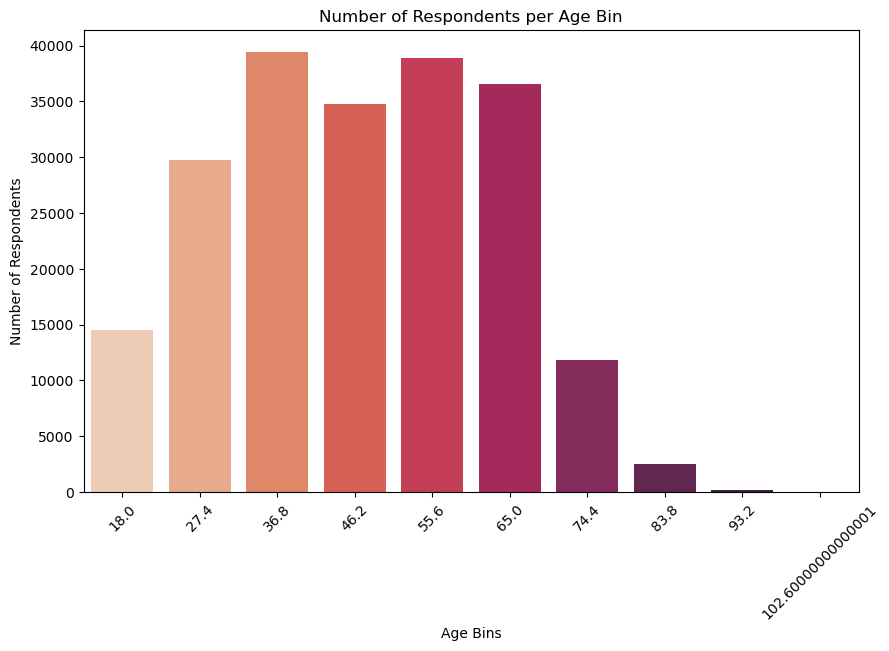

In [271]:
print(newdf['age'].describe()) 
#age is a categorical variable here
age_counts = newdf['age'].value_counts().sort_index()

#plot
#create 10 bins for age
age_counts, bin_edges = np.histogram(newdf['age'].dropna(), bins=10)
plt.figure(figsize=(10, 6))
sns.barplot(x=bin_edges[:-1], y=age_counts, palette='rocket_r')  #bin_edges[:-1] to align with counts
plt.title('Number of Respondents per Age Bin')
plt.xlabel('Age Bins')
plt.ylabel('Number of Respondents')
plt.xticks(rotation=45)
plt.show()

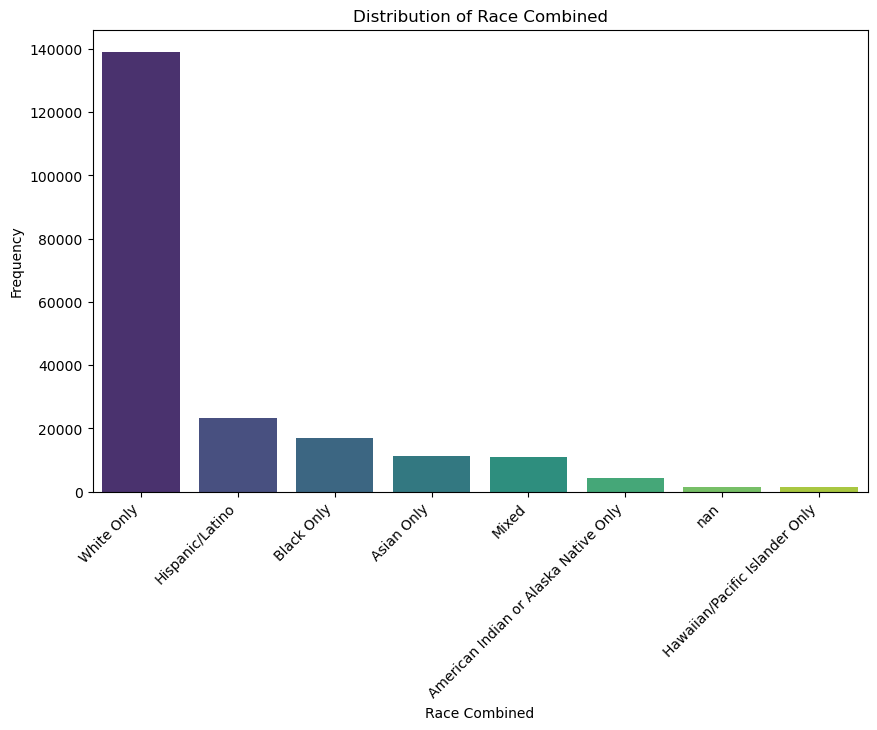

In [272]:
race_counts = newdf['race_combined'].value_counts()

plt.figure(figsize=(10, 6))
sns.countplot(data=newdf, x='race_combined', order=race_counts.index, palette='viridis')
plt.title('Distribution of Race Combined')
plt.xlabel('Race Combined')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.show()

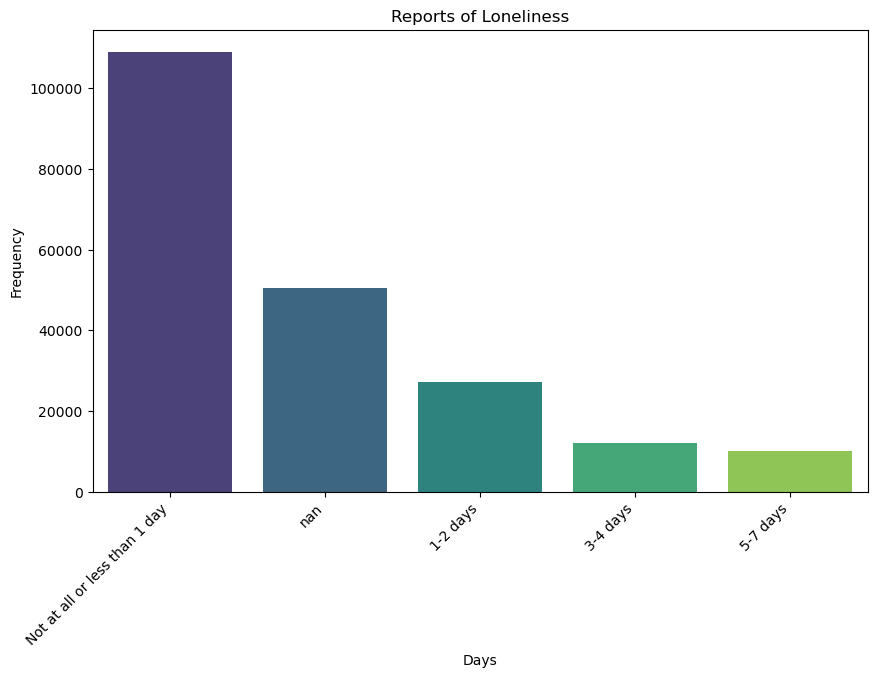

In [273]:
lone_counts = newdf['cr058'].value_counts()

plt.figure(figsize=(10, 6))
sns.countplot(data=newdf, x='cr058', order=lone_counts.index, palette='viridis')
plt.title('Reports of Loneliness')
plt.xlabel('Days')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.show()

In [274]:
newdf['cr058'].isnull().sum()

0

In [275]:
#replace empty strings with NaN in cr058
newdf['cr058'] = newdf['cr058'].replace('nan', pd.NA)


In [276]:
newdf['cr058'].isnull().sum()

50535

In [277]:
newdf.shape

(208825, 4223)

### Dropping records where cr058 (loneliness) is null

In [278]:
newdf = newdf.dropna(subset=['cr058'])

In [279]:
newdf['cr058'].value_counts()

cr058
Not at all or less than 1 day    109047
1-2 days                          27236
3-4 days                          12038
5-7 days                           9969
Name: count, dtype: int64

In [280]:
newdf.shape

(158290, 4223)

In [281]:
newdf['hhincome'].value_counts()

hhincome
15 100,000 to 149,999    22746
14 75,000 to 99,999      22343
16 150,000 or more       18970
13 60,000 to 74,999      17483
12 50,000 to 59,999      12732
11 40,000 to 49,999      11855
10 35,000 to 39,999       7621
9 30,000 to 34,999        7384
8 25,000 to 29,999        7125
7 20,000 to 24,999        6849
6 15,000 to 19,999        5531
1 Less than $5,000        5444
4 10,000 to 12,499        4067
5 12,500 to 14,999        3222
3 7,500 to 9,999          2434
2 5,000 to 7,499          2158
Name: count, dtype: int64

In [282]:
#mapping to create broader categories for income

income_mapping = {
    '1 Less than $5,000': 'Less than $20,000',
    '2 5,000 to 7,499': 'Less than $20,000',
    '3 7,500 to 9,999': 'Less than $20,000',
    '4 10,000 to 12,499': 'Less than $20,000',
    '5 12,500 to 14,999': 'Less than $20,000',
    '6 15,000 to 19,999': 'Less than $20,000',
    '7 20,000 to 24,999': '$20,000 to $49,999',
    '8 25,000 to 29,999': '$20,000 to $49,999',
    '9 30,000 to 34,999': '$20,000 to $49,999',
    '10 35,000 to 39,999': '$20,000 to $49,999',
    '11 40,000 to 49,999': '$20,000 to $49,999',
    '12 50,000 to 59,999': '$50,000 to $99,999',
    '13 60,000 to 74,999': '$50,000 to $99,999',
    '14 75,000 to 99,999': '$50,000 to $99,999',
    '15 100,000 to 149,999': '$100,000 to $149,999',
    '16 150,000 or more': '$150,000 or more'
}


In [283]:
newdf['hhincome'] = newdf['hhincome'].map(income_mapping)
newdf['hhincome'].value_counts()

hhincome
$50,000 to $99,999      52558
$20,000 to $49,999      40834
Less than $20,000       22856
$100,000 to $149,999    22746
$150,000 or more        18970
Name: count, dtype: int64

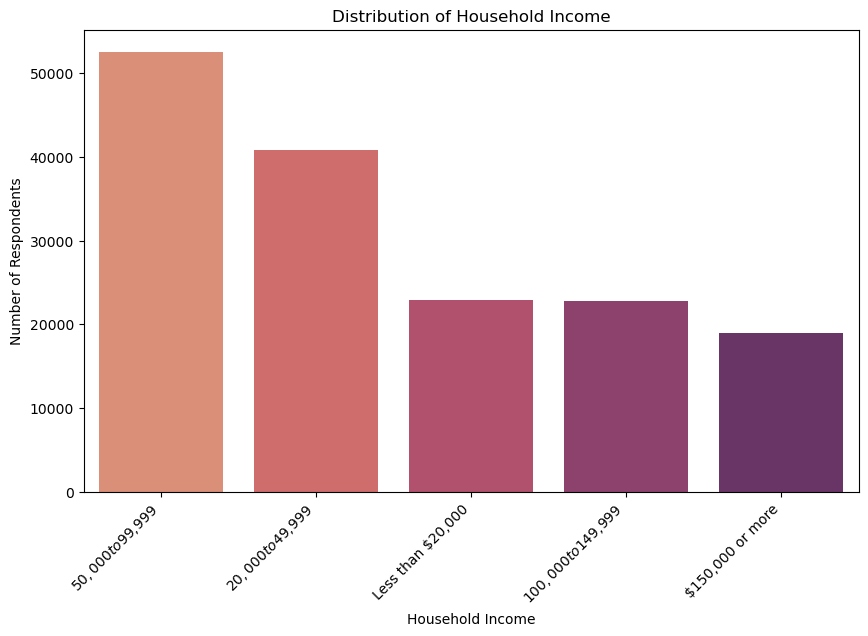

In [284]:
plt.figure(figsize=(10, 6))
sns.countplot(data=newdf, x='hhincome', order=newdf['hhincome'].value_counts().index, palette='flare')
plt.title('Distribution of Household Income')
plt.xlabel('Household Income')
plt.ylabel('Number of Respondents')
plt.xticks(rotation=45, ha='right')
plt.show()

In [285]:
newdf['citizenus'].value_counts()

citizenus
1 Yes    153360
0 No       4888
Name: count, dtype: int64

In [286]:
newdf['immigrant_status'].value_counts()

immigrant_status
0 Non-immigrant                  84927
3 Third generation immigrant     28676
2 Second generation immigrant    22642
1 First generation immigrant     17861
4 Unknown immigrant status        4184
Name: count, dtype: int64

In [287]:
newdf['statereside'].value_counts()

statereside
6 California               49460
39 Ohio                     7177
42 Pennsylvania             6492
12 Florida                  6092
48 Texas                    5974
26 Michigan                 5009
36 New York                 4739
17 Illinois                 4233
13 Georgia                  4072
55 Wisconsin                4006
37 North Carolina           3984
51 Virginia                 3848
18 Indiana                  3794
29 Missouri                 2995
47 Tennessee                2974
53 Washington               2797
20 Kansas                   2692
19 Iowa                     2395
21 Kentucky                 2323
5 Arkansas                  2260
4 Arizona                   2080
27 Minnesota                2070
1 Alabama                   2012
54 West Virginia            1992
34 New Jersey               1969
45 South Carolina           1700
8 Colorado                  1513
25 Massachusetts            1445
40 Oklahoma                 1437
41 Oregon                   142

In [288]:
#remove leading numbers and spaces before the state names
newdf['statereside'] = newdf['statereside'].str.replace(r'^\d+\s+', '', regex=True)
newdf['statereside'].value_counts()

statereside
California              49460
Ohio                     7177
Pennsylvania             6492
Florida                  6092
Texas                    5974
Michigan                 5009
New York                 4739
Illinois                 4233
Georgia                  4072
Wisconsin                4006
North Carolina           3984
Virginia                 3848
Indiana                  3794
Missouri                 2995
Tennessee                2974
Washington               2797
Kansas                   2692
Iowa                     2395
Kentucky                 2323
Arkansas                 2260
Arizona                  2080
Minnesota                2070
Alabama                  2012
West Virginia            1992
New Jersey               1969
South Carolina           1700
Colorado                 1513
Massachusetts            1445
Oklahoma                 1437
Oregon                   1421
Mississippi              1366
Montana                  1258
Utah                     110

In [289]:
newdf['ei002'].value_counts() #question: worried you would run out of food

ei002
2 No        147287
1 Yes         8357
3 Unsure      2410
Name: count, dtype: int64

In [290]:
newdf['disabled'].value_counts()

disabled
0 No     145050
1 Yes     13158
Name: count, dtype: int64

In [291]:
#convert start_date to datetime 
newdf['start_date'] = pd.to_datetime(newdf['start_date'])
#sort values by start_date to get the earliest date first
newdf_sorted = newdf.sort_values(by='start_date')

print(newdf_sorted['start_date'])

24561    2020-04-29
24930    2020-04-29
21451    2020-04-29
20883    2020-04-29
20603    2020-04-29
            ...    
175520   2021-07-19
176778   2021-07-19
178721   2021-07-19
175735   2021-07-19
176927   2021-07-19
Name: start_date, Length: 158290, dtype: datetime64[ns]


In [292]:
#convert start_date to datetime 
newdf['end_date'] = pd.to_datetime(newdf['end_date'])
#sort values by start_date to get the earliest date first
newdf_sorted = newdf.sort_values(by='end_date',ascending=False)

print(newdf_sorted['end_date'])

175596   2021-07-19
176927   2021-07-19
175443   2021-07-19
176706   2021-07-19
177374   2021-07-19
            ...    
177618          NaT
177864          NaT
178491          NaT
179003          NaT
179007          NaT
Name: end_date, Length: 158290, dtype: datetime64[ns]


In [293]:
newdf['start_year'].value_counts()

start_year
2020.0    107637
2021.0     50653
Name: count, dtype: int64

count    158290.000000
mean         16.345448
std           7.499554
min           4.000000
25%          10.000000
50%          16.000000
75%          23.000000
max          29.000000
Name: wave, dtype: float64


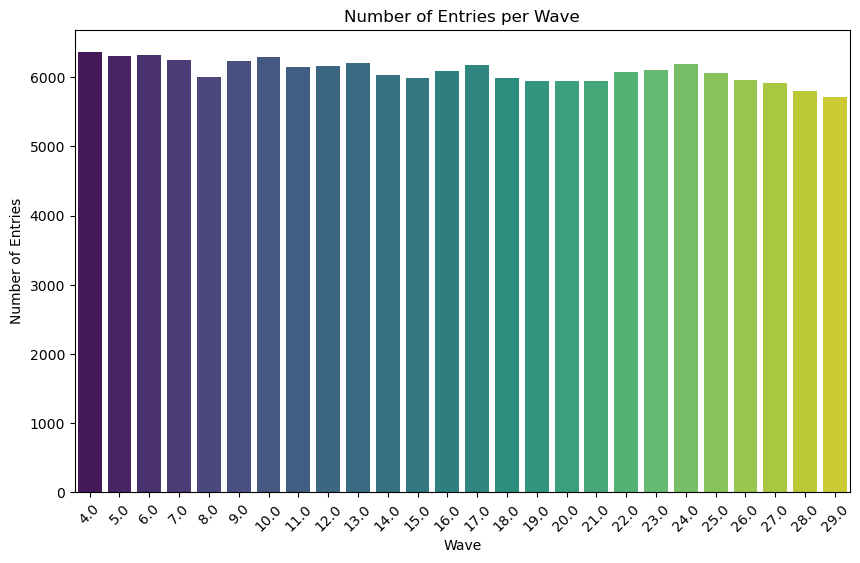

In [294]:
print(newdf['wave'].describe())

#calculate the number of entries per wave of the survey
wave_counts = newdf['wave'].value_counts().sort_index()

#plot
plt.figure(figsize=(10, 6))
sns.barplot(x=wave_counts.index, y=wave_counts.values, palette='viridis')
plt.title('Number of Entries per Wave')
plt.xlabel('Wave')
plt.ylabel('Number of Entries')
plt.xticks(rotation=45)
plt.show()

In [295]:
#number of unique participants
newdf['uasid'].nunique()
#the 200,000+ observations are recorded over time for these ~8000 participants
#so it is possible to track them through time

8303

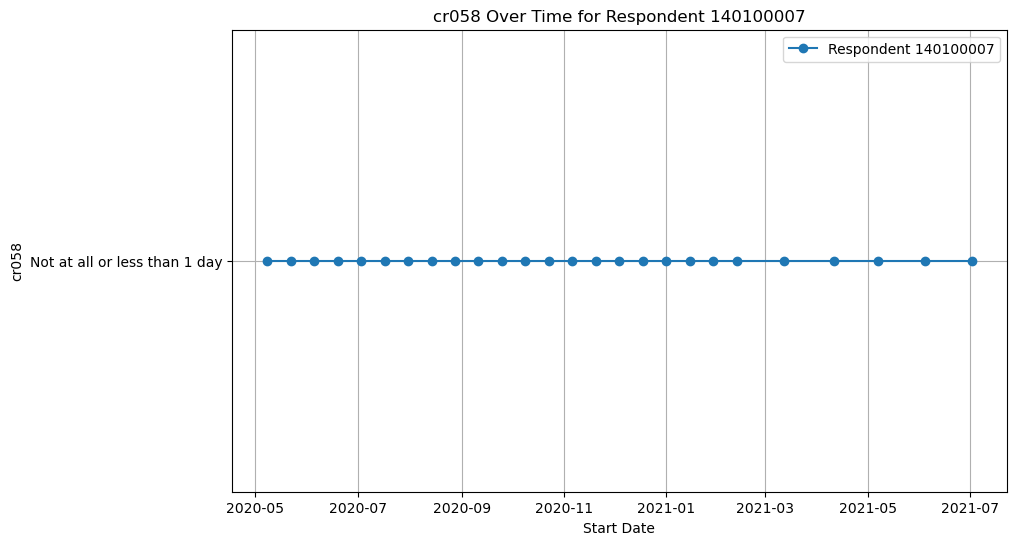

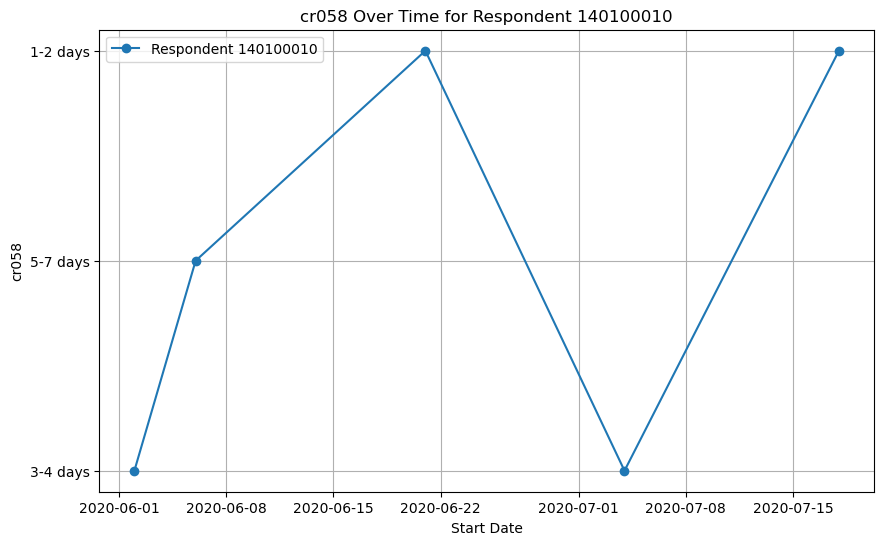

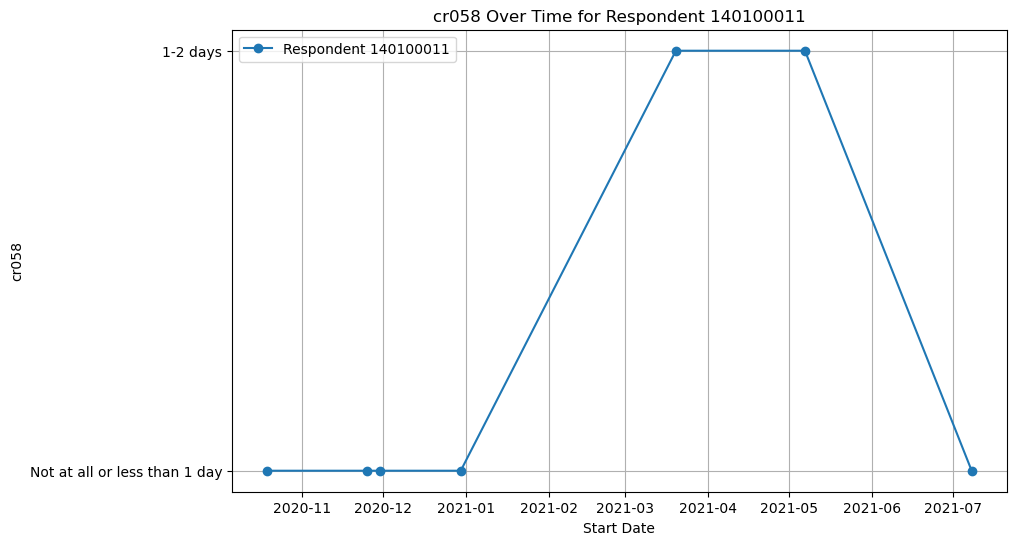

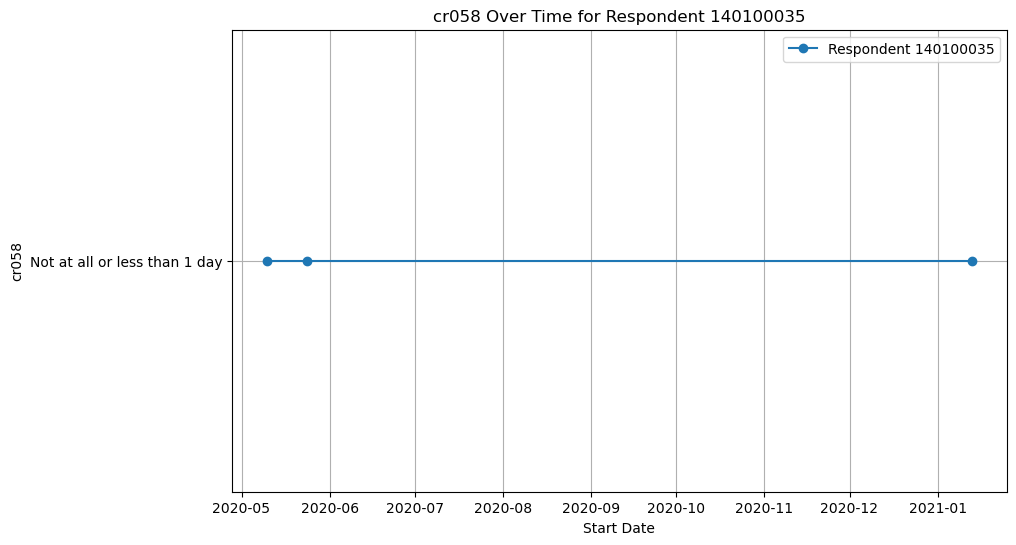

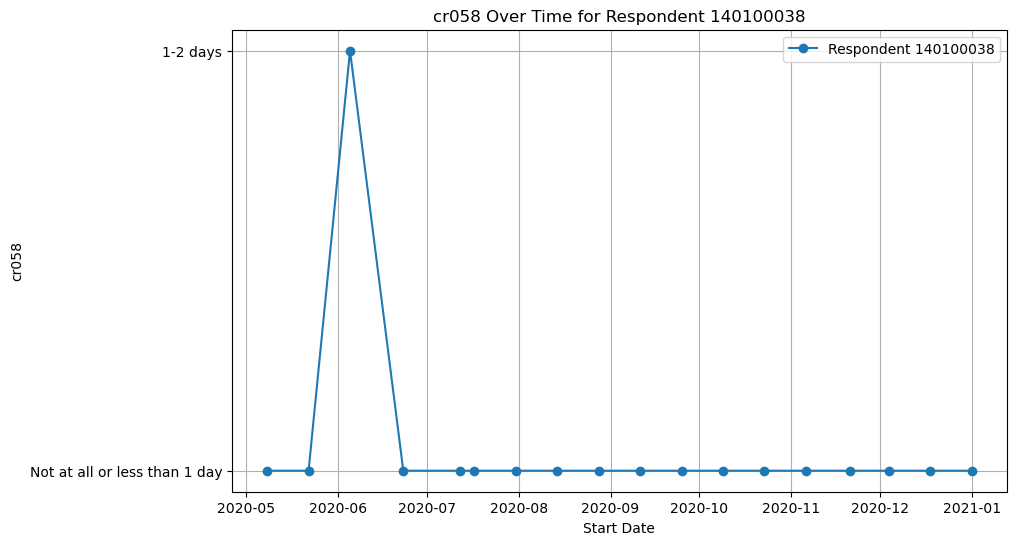

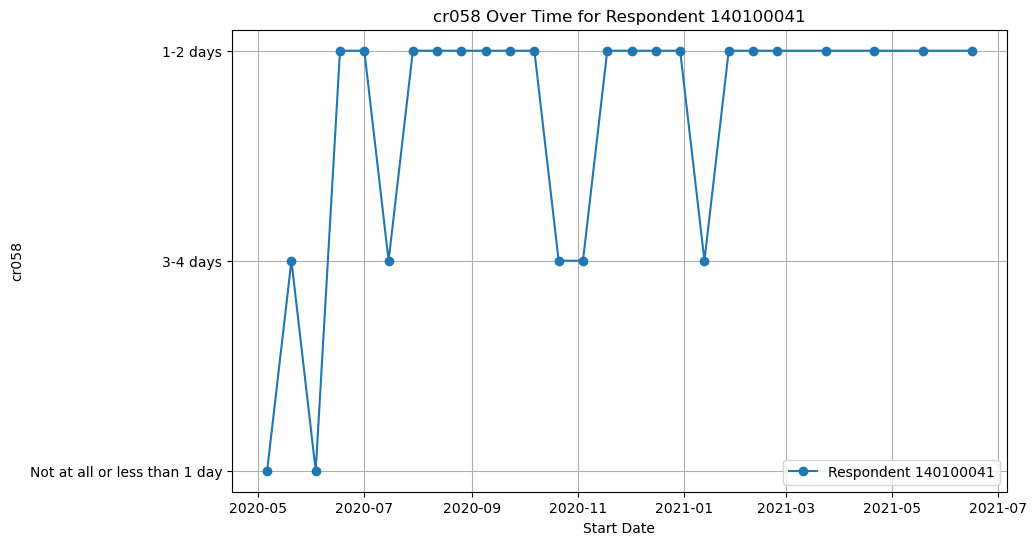

In [296]:
#plot the responses for lonelines. As there are too many participants, we only plot the first six as an example
newdf['start_date'] = pd.to_datetime(newdf['start_date'])

#group the df by uasid
grouped = newdf.groupby('uasid')
#counter to keep track of the number of respondents plotted
counter = 0
max_plots = 6  #number of respondents to plot

for name, group in grouped:
    plt.figure(figsize=(10, 6))
    plt.plot(group['start_date'], group['cr058'], marker='o', linestyle='-', label=f'Respondent {name}')
    plt.title(f'cr058 Over Time for Respondent {name}')
    plt.xlabel('Start Date')
    plt.ylabel('cr058')
    plt.legend()
    plt.grid(True)
    plt.show()

    #increment the counter 
    counter += 1
    if counter >= max_plots:
        break


In [297]:
newdf['maritalstatus'].value_counts()

maritalstatus
1 Married (spouse lives with me)      87149
6 Never married                       35092
4 Divorced                            23489
5 Widowed                              8067
3 Separated                            2625
2 Married (spouse lives elsewhere)     1793
Name: count, dtype: int64

In [298]:
#remove leading numbers and spaces
newdf['maritalstatus'] = newdf['maritalstatus'].str.replace(r'^\d+\s+', '', regex=True)
newdf['maritalstatus'].value_counts()

maritalstatus
Married (spouse lives with me)      87149
Never married                       35092
Divorced                            23489
Widowed                              8067
Separated                            2625
Married (spouse lives elsewhere)     1793
Name: count, dtype: int64

In [299]:
newdf['education'].value_counts()
#highest level of education

education
13 Bachelor's degree                      39478
10 Some college-no degree                 35064
9 High school graduate or GED             25601
14 Master's degree                        21148
11 Assoc. college degree-occ/voc prog     11682
12 Assoc. college degree-academic prog    10890
16 Doctorate degree                        3598
15 Professional school degree              3462
8 12th grade-no diploma                    2326
7 11th grade                               1479
6 10th grade                               1253
5 9th grade                                1244
4 7th or 8th grade                          603
3 5th or 6th grade                          258
2 Up to 4th grade                           121
1 Less than 1st grade                        37
Name: count, dtype: int64

In [300]:
#remove leading numbers and spaces
newdf['education'] = newdf['education'].str.replace(r'^\d+\s+', '', regex=True)
newdf['education'].value_counts()

education
Bachelor's degree                      39478
Some college-no degree                 35064
High school graduate or GED            25601
Master's degree                        21148
Assoc. college degree-occ/voc prog     11682
Assoc. college degree-academic prog    10890
Doctorate degree                        3598
Professional school degree              3462
12th grade-no diploma                   2326
11th grade                              1479
10th grade                              1253
9th grade                               1244
7th or 8th grade                         603
5th or 6th grade                         258
Up to 4th grade                          121
Less than 1st grade                       37
Name: count, dtype: int64

In [301]:
#mapping to create broader categories for education

education_mapping = {
    "Less than 1st grade": "Less than High School",
    "Up to 4th grade": "Less than High School",
    "5th or 6th grade": "Less than High School",
    "7th or 8th grade": "Less than High School",
    "9th grade": "Less than High School",
    "10th grade": "Less than High School",
    "11th grade": "Less than High School",
    "12th grade-no diploma": "Less than High School",
    "High school graduate or GED": "High school graduate or GED",
    "Some college-no degree": "High school graduate or GED",
    "Assoc. college degree-occ/voc prog": "Associate Degree",
    "Assoc. college degree-academic prog": "Associate Degree",
    "Bachelor's degree": "Bachelor's Degree",
    "Master's degree": "Graduate/Professional Degree",
    "Doctorate degree": "Doctorate Degree",
    "Professional school degree": "Graduate/Professional Degree"
}

In [302]:
newdf['education'] = newdf['education'].map(education_mapping)
newdf['education'].value_counts()

education
High school graduate or GED     60665
Bachelor's Degree               39478
Graduate/Professional Degree    24610
Associate Degree                22572
Less than High School            7321
Doctorate Degree                 3598
Name: count, dtype: int64

In [303]:
newdf['working'].value_counts()

working
1 Yes    88356
0 No     69852
Name: count, dtype: int64

In [304]:
newdf['retired'].value_counts()

retired
0 No     120661
1 Yes     37547
Name: count, dtype: int64

In [305]:
newdf['employmenttype'].value_counts()

employmenttype
2 Private (for profit)    48656
1 Government              17604
3 Private (no profit)     12537
4 Self-employed           10972
Name: count, dtype: int64

In [306]:
newdf['anyhhmember'].value_counts()

anyhhmember
1 Yes    130385
0 No      27858
Name: count, dtype: int64

In [307]:
newdf['hhmembernumber'].value_counts()

hhmembernumber
1.0     62312
0.0     27858
2.0     24963
3.0     21754
4.0     10661
5.0      4004
6.0      1563
7.0       517
8.0       311
9.0        36
11.0       21
10.0        9
12.0        7
Name: count, dtype: int64

In [308]:
hhmember_mapping = {
    1.0: '1',
    0.0: '0',
    2.0: '2',
    3.0: '3',
    4.0: '4',
    5.0: '5',
    6.0: '5+',
    7.0: '5+',
    8.0: '5+',
    9.0: '5+',
    10.0: '5+',
    11.0: '5+',
    12.0: '5+'
}
newdf['hhmembernumber'] = newdf['hhmembernumber'].map(hhmember_mapping)
newdf['hhmembernumber'].value_counts()

hhmembernumber
1     62312
0     27858
2     24963
3     21754
4     10661
5      4004
5+     2464
Name: count, dtype: int64

In [328]:
newdf['coping_call'].value_counts()
#Days in the past week had phone/video call with family/friend

coping_call
7 7 days    44462
3 3 days    22571
2 2 days    22079
4 4 days    16298
0 0 days    16200
5 5 days    15398
1 1 day     14328
6 6 days     6851
Name: count, dtype: int64

In [330]:
newdf['coping_cigarette'].value_counts()
#Days in the past week smoked all or part of cigarette

coping_cigarette
0 0 days    139131
7 7 days     14148
1 1 day       1294
2 2 days       883
3 3 days       841
5 5 days       727
4 4 days       718
6 6 days       449
Name: count, dtype: int64

In [332]:
newdf['coping_drugs'].value_counts()
#Days in the past week used recreational drugs

coping_drugs
0 0 days    153396
1 1 days      1123
7 7 days      1095
2 2 days       885
3 3 days       712
4 4 days       444
5 5 days       356
6 6 days       185
Name: count, dtype: int64

In [333]:
newdf['coping_drinking'].value_counts()
#Days in the past week drank alcohol

coping_drinking
0 0 days    89747
1 1 days    18294
2 2 days    14422
3 3 days    10628
7 7 days     9786
4 4 days     6448
5 5 days     5699
6 6 days     3152
Name: count, dtype: int64

In [334]:
newdf['coping_socmedia'].value_counts()
#Days in the past week spent on social media

coping_socmedia
7 7 days    66717
0 0 days    39059
5 5 days    10695
3 3 days     9366
2 2 days     9069
4 4 days     8392
1 1 day      7791
6 6 days     7094
Name: count, dtype: int64

In [309]:
newdf['cr054s10'].value_counts()
#Obesity

cr054s10
0 No     129528
1 Yes     28678
Name: count, dtype: int64

## Exploratory Analysis

<Figure size 1200x800 with 0 Axes>

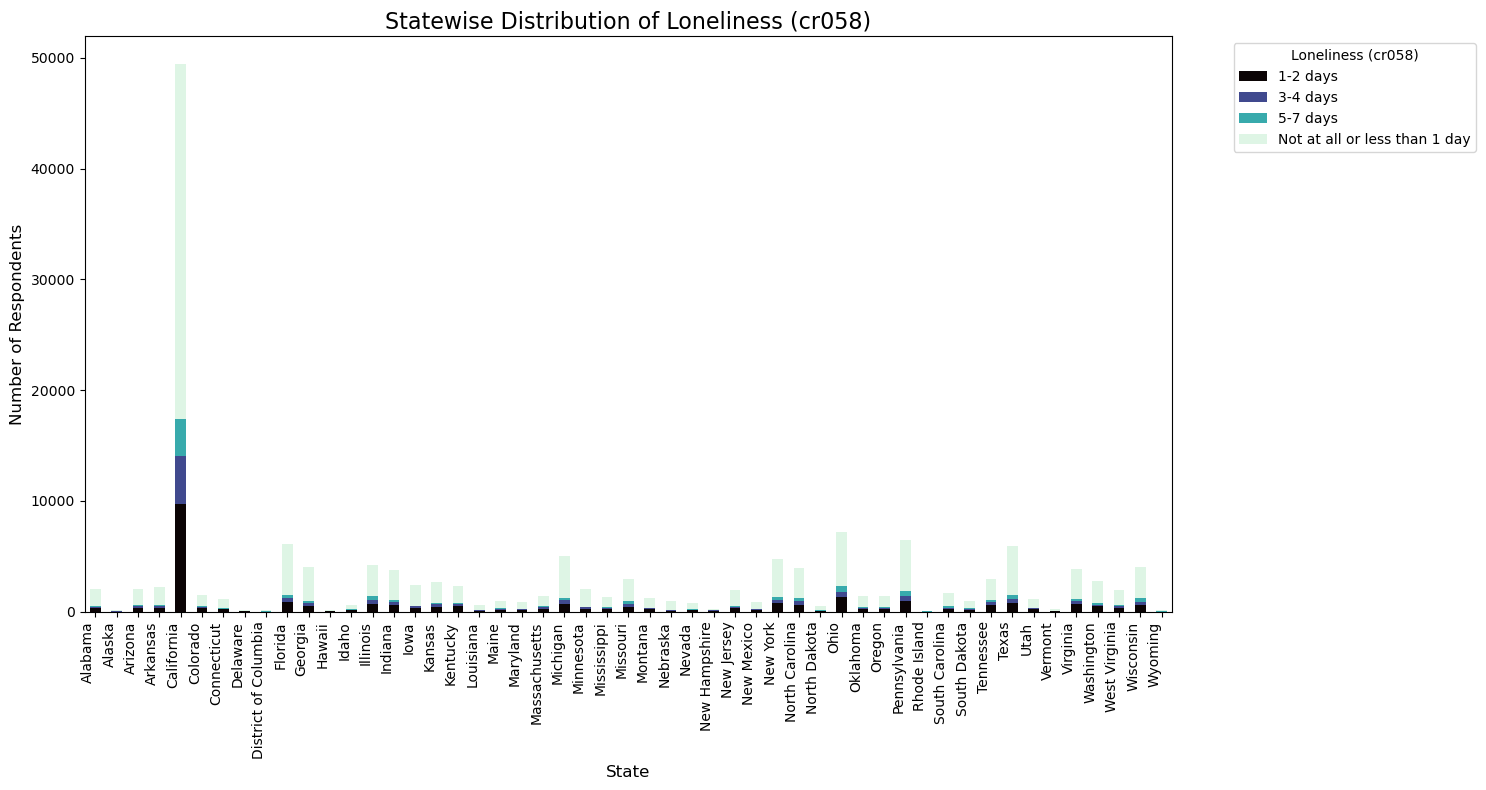

In [310]:
#plot the loneliness severity by state
statewise_loneliness = newdf.groupby(['statereside', 'cr058']).size().unstack(fill_value=0)

plt.figure(figsize=(12, 8))
statewise_loneliness.plot(kind='bar', stacked=True, colormap='mako', figsize=(15, 8))
plt.title('Statewise Distribution of Loneliness (cr058)', fontsize=16)
plt.xlabel('State', fontsize=12)
plt.ylabel('Number of Respondents', fontsize=12)
plt.xticks(rotation=90, ha='right')
plt.legend(title='Loneliness (cr058)', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


The previous plot is skewed as most of the responses are from the state of California. We normalise it to be able to see the variation in loneliness across the states

<Figure size 1200x800 with 0 Axes>

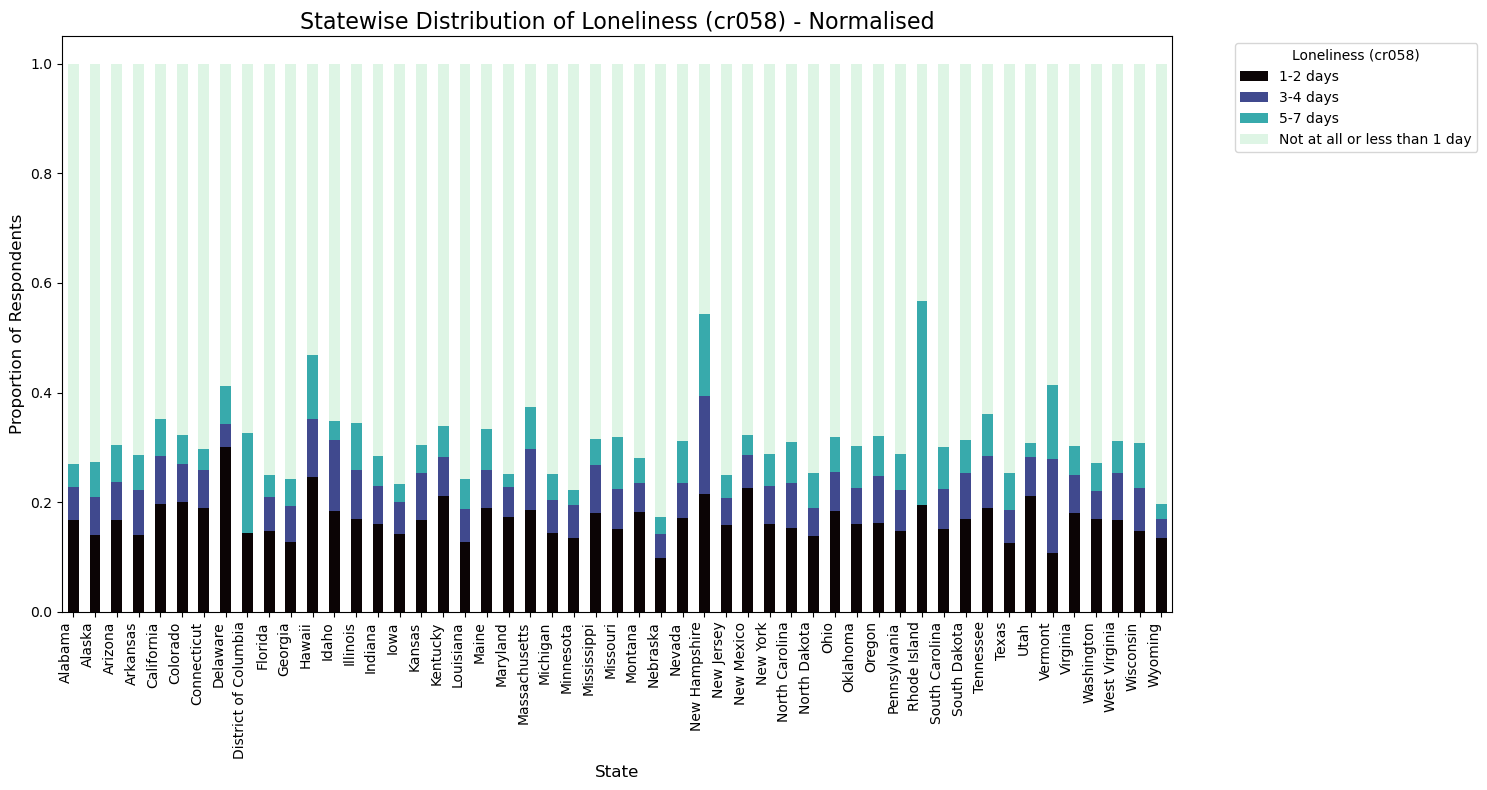

In [311]:

#group by statereside and cr058 to get counts per state and loneliness level
statewise_loneliness = newdf.groupby(['statereside', 'cr058']).size().unstack(fill_value=0)
#normalise the counts to get proportions
statewise_loneliness_normalized = statewise_loneliness.div(statewise_loneliness.sum(axis=1), axis=0)

#plot the normalised data
plt.figure(figsize=(12, 8))
statewise_loneliness_normalized.plot(kind='bar', stacked=True, colormap='mako', figsize=(15, 8))

plt.title('Statewise Distribution of Loneliness (cr058) - Normalised', fontsize=16)
plt.xlabel('State', fontsize=12)
plt.ylabel('Proportion of Respondents', fontsize=12)
plt.xticks(rotation=90, ha='right')
plt.legend(title='Loneliness (cr058)', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


We see that the states of New Hampshire and Rhode Island report more cases of severe loneliness.

In [312]:
#view the number of participants from this state
filt = newdf[newdf['statereside'].isin(['Rhode Island', 'New Hampshire'])]
print(filt['statereside'].value_counts())

statereside
New Hampshire    289
Rhode Island      67
Name: count, dtype: int64


It's possible that the inflation in the number of loneliness cases can be attributed to the small sample size for these states.

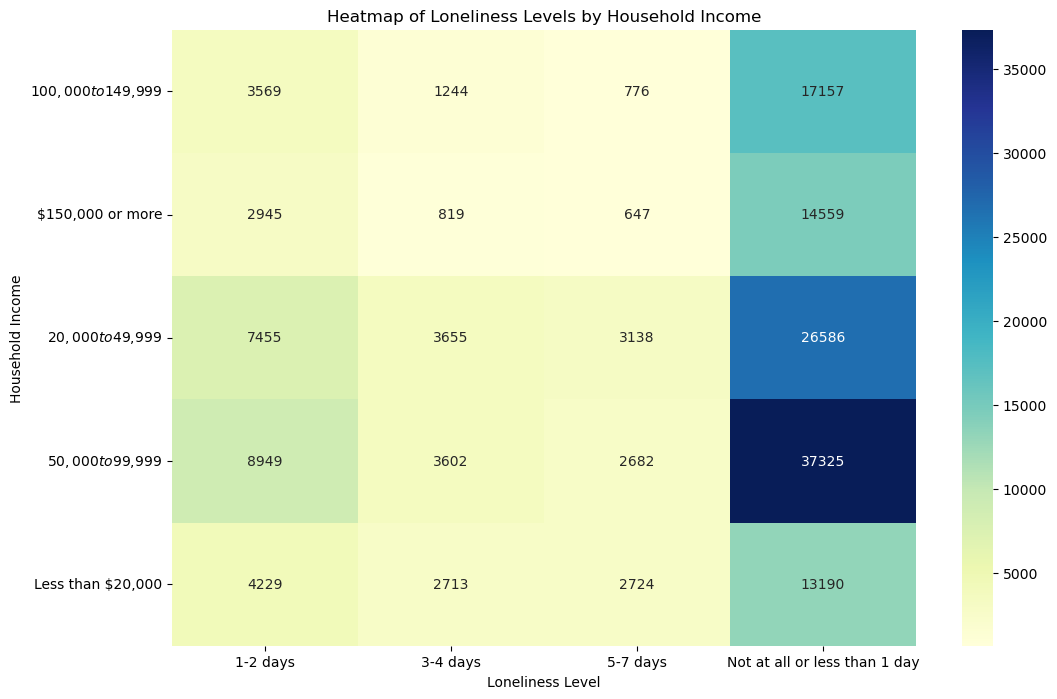

In [313]:
#observe relationship between income and loneliness
#create a pivot table as the variables are categorical
heatmap_data = newdf.pivot_table(index='hhincome', columns='cr058', aggfunc='size', fill_value=0)
#create a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, annot=True, fmt='d', cmap='YlGnBu')
plt.title('Heatmap of Loneliness Levels by Household Income')
plt.xlabel('Loneliness Level')
plt.ylabel('Household Income')
plt.show()


In [314]:
newdf['hhincome'].value_counts()

hhincome
$50,000 to $99,999      52558
$20,000 to $49,999      40834
Less than $20,000       22856
$100,000 to $149,999    22746
$150,000 or more        18970
Name: count, dtype: int64

In [315]:
#create a pivot table counting occurrences
count_table = newdf.pivot_table(index='hhincome', columns='cr058', aggfunc='size', fill_value=0)
#calculate proportions for each household income level
proportion_table = count_table.div(count_table.sum(axis=1), axis=0)

proportion_table.reset_index(inplace=True)
proportion_table.columns.name = None #reomve column names
proportion_table.columns = [f"{col} (Proportion)" if col != 'hhincome' else 'Household Income' for col in proportion_table.columns]
styled_table = proportion_table.style.set_caption("Proportions of Loneliness Levels by Household Income")
styled_table


,Household Income,1-2 days (Proportion),3-4 days (Proportion),5-7 days (Proportion),Not at all or less than 1 day (Proportion)
0,"$100,000 to $149,999",0.156907,0.054691,0.034116,0.754286
1,"$150,000 or more",0.155245,0.043173,0.034106,0.767475
2,"$20,000 to $49,999",0.182568,0.089509,0.076848,0.651075
3,"$50,000 to $99,999",0.170269,0.068534,0.051029,0.710168
4,"Less than $20,000",0.185028,0.118700,0.119181,0.577091


As most entries are from respondents earning between \\$20,000 and \\$99,999, we see an increase in reported loneliness for those respondents. 

Across all income brackets, a significant proportion of respondents report "Not at all or less than 1 day" of loneliness. However, the data suggests a negative correlation between household income and reported levels of loneliness. The proportion of respondents reporting "Not at all or less than 1 day" is lower for those earning less than \\$20,000, indicating higher incidence of loneliness in lower income brackets.

In [316]:
#relationship between marital status and loneliness
count_table = newdf.pivot_table(index='maritalstatus', columns='cr058', aggfunc='size', fill_value=0)
#calculate proportions for each status
proportion_table = count_table.div(count_table.sum(axis=1), axis=0)

proportion_table.reset_index(inplace=True)
proportion_table.columns.name = None  #reomve column names
styled_table = proportion_table.style.set_caption("Proportions of Loneliness Levels by Marital Status")
styled_table


,maritalstatus,1-2 days,3-4 days,5-7 days,Not at all or less than 1 day
0,Divorced,0.192132,0.095406,0.086807,0.625655
1,Married (spouse lives elsewhere),0.247630,0.113218,0.064696,0.574456
2,Married (spouse lives with me),0.136823,0.051498,0.033368,0.778311
3,Never married,0.235410,0.118574,0.105637,0.540380
4,Separated,0.199238,0.126857,0.135238,0.538667
5,Widowed,0.194496,0.073881,0.103880,0.627743


There seems to be some association between marital and loneliness. Unsurprisingly, unmarried, separated and windowed individuals tend to report higher levels of loneliness.

In [317]:
#relationship between education and loneliness
count_table = newdf.pivot_table(index='education', columns='cr058', aggfunc='size', fill_value=0)
#calculate proportions for each status
proportion_table = count_table.div(count_table.sum(axis=1), axis=0)

proportion_table.reset_index(inplace=True)
proportion_table.columns.name = None  #remomve column names
styled_table = proportion_table.style.set_caption("Proportions of Loneliness Levels by Education Level")
styled_table


,education,1-2 days,3-4 days,5-7 days,Not at all or less than 1 day
0,Associate Degree,0.169812,0.078460,0.067650,0.684078
1,Bachelor's Degree,0.189397,0.079538,0.059046,0.672020
2,Doctorate Degree,0.181490,0.049750,0.054753,0.714008
3,Graduate/Professional Degree,0.180902,0.066193,0.047501,0.705404
4,High school graduate or GED,0.159763,0.075431,0.066991,0.697816
5,Less than High School,0.153121,0.099440,0.092201,0.655238


There does not seem to be a discernible pattern in loneliness by education level.

In [318]:
#relationship between race and loneliness
count_table = newdf.pivot_table(index='race_combined', columns='cr058', aggfunc='size', fill_value=0)
#calculate proportions for each status
proportion_table = count_table.div(count_table.sum(axis=1), axis=0)

proportion_table.reset_index(inplace=True)
proportion_table.columns.name = None  #remomve column names
styled_table = proportion_table.style.set_caption("Proportions of Loneliness Levels by Race")
styled_table


,race_combined,1-2 days,3-4 days,5-7 days,Not at all or less than 1 day
0,American Indian or Alaska Native Only,0.180547,0.101216,0.086322,0.631915
1,Asian Only,0.218303,0.084017,0.068667,0.629013
2,Black Only,0.163078,0.076156,0.049362,0.711404
3,Hawaiian/Pacific Islander Only,0.220114,0.118596,0.112903,0.548387
4,Hispanic/Latino,0.179893,0.077105,0.060599,0.682403
5,Mixed,0.165119,0.083464,0.087203,0.664214
6,White Only,0.167180,0.073356,0.061651,0.697813
7,nan,0.241893,0.084137,0.040316,0.633655


In [319]:
newdf['race_combined'].value_counts()

race_combined
White Only                               106113
Hispanic/Latino                           17327
Black Only                                12540
Asian Only                                 8534
Mixed                                      8291
American Indian or Alaska Native Only      3290
nan                                        1141
Hawaiian/Pacific Islander Only             1054
Name: count, dtype: int64

As most of the sample size is composed mostly of white people, analysing loneliness by race will not yield significant results.

In [320]:
#relationship between retirement and loneliness
count_table = newdf.pivot_table(index='retired', columns='cr058', aggfunc='size', fill_value=0)
#calculate proportions for each status
proportion_table = count_table.div(count_table.sum(axis=1), axis=0)

proportion_table.reset_index(inplace=True)
proportion_table.columns.name = None  #remove column names
styled_table = proportion_table.style.set_caption("Proportions of Loneliness Levels by Retirement Status")
styled_table

,retired,1-2 days,3-4 days,5-7 days,Not at all or less than 1 day
0,0 No,0.180572,0.081692,0.070752,0.666984
1,1 Yes,0.144992,0.057821,0.037819,0.759368


In [321]:
#relationship between disability and loneliness
count_table = newdf.pivot_table(index='disabled', columns='cr058', aggfunc='size', fill_value=0)
#calculate proportions for each status
proportion_table = count_table.div(count_table.sum(axis=1), axis=0)

proportion_table.reset_index(inplace=True)
proportion_table.columns.name = None  #remove column names
styled_table = proportion_table.style.set_caption("Proportions of Loneliness Levels by Disability")
styled_table

,disabled,1-2 days,3-4 days,5-7 days,Not at all or less than 1 day
0,0 No,0.170603,0.070851,0.054919,0.703626
1,1 Yes,0.188934,0.133075,0.151315,0.526676


Disables people are more likely to report loneliness

In [322]:
#relationship between gender and loneliness
count_table = newdf.pivot_table(index='gender', columns='cr058', aggfunc='size', fill_value=0)
#calculate proportions for each status
proportion_table = count_table.div(count_table.sum(axis=1), axis=0)

proportion_table.reset_index(inplace=True)
proportion_table.columns.name = None  #remove column names
styled_table = proportion_table.style.set_caption("Proportions of Loneliness Levels by Gender")
styled_table

,gender,1-2 days,3-4 days,5-7 days,Not at all or less than 1 day
0,0 Female,0.193364,0.089069,0.069012,0.648555
1,1 Male,0.141931,0.057633,0.054444,0.745992


In [324]:
#relationship between number of household members and loneliness
count_table = newdf.pivot_table(index='hhmembernumber', columns='cr058', aggfunc='size', fill_value=0)
#calculate proportions for each status
proportion_table = count_table.div(count_table.sum(axis=1), axis=0)

proportion_table.reset_index(inplace=True)
proportion_table.columns.name = None  #remove column names
styled_table = proportion_table.style.set_caption("Proportions of Loneliness Levels by Number of Household Members")
styled_table

,hhmembernumber,1-2 days,3-4 days,5-7 days,Not at all or less than 1 day
0,0,0.219004,0.107222,0.113038,0.560737
1,1,0.154031,0.062877,0.044823,0.738269
2,2,0.165205,0.073268,0.059408,0.702119
3,3,0.171463,0.072998,0.055576,0.699963
4,4,0.175781,0.069881,0.058812,0.695526
5,5,0.178072,0.091159,0.054446,0.676324
6,5+,0.170860,0.102273,0.096997,0.629870


People who live alone are more susceptible to loneliness.

In [338]:
#relationship between social media use and loneliness
count_table = newdf.pivot_table(index='coping_socmedia', columns='cr058', aggfunc='size', fill_value=0)
#calculate proportions for each status
proportion_table = count_table.div(count_table.sum(axis=1), axis=0)

proportion_table.reset_index(inplace=True)
proportion_table.columns.name = None  #remove column names
styled_table = proportion_table.style.set_caption("Proportions of Loneliness Levels by Frequency of Social Media Use (in a week)")
styled_table

,coping_socmedia,1-2 days,3-4 days,5-7 days,Not at all or less than 1 day
0,0 0 days,0.131468,0.055685,0.056018,0.756829
1,1 1 day,0.186882,0.072520,0.057117,0.683481
2,2 2 days,0.174330,0.087882,0.055905,0.681883
3,3 3 days,0.188981,0.092249,0.053171,0.665599
4,4 4 days,0.187798,0.089728,0.049929,0.672545
5,5 5 days,0.191865,0.081346,0.047966,0.678822
6,6 6 days,0.202566,0.088807,0.050606,0.658021
7,7 7 days,0.183042,0.080579,0.075363,0.661016


In [339]:
#relationship between alcoholism and loneliness
count_table = newdf.pivot_table(index='coping_drinking', columns='cr058', aggfunc='size', fill_value=0)
#calculate proportions for each status
proportion_table = count_table.div(count_table.sum(axis=1), axis=0)

proportion_table.reset_index(inplace=True)
proportion_table.columns.name = None  #remove column names
styled_table = proportion_table.style.set_caption("Proportions of Loneliness Levels by Number of Days consuming Alcoholic Drinks per Week ")
styled_table

,coping_drinking,1-2 days,3-4 days,5-7 days,Not at all or less than 1 day
0,0 0 days,0.162624,0.075055,0.068637,0.693683
1,1 1 days,0.192467,0.077840,0.055428,0.674265
2,2 2 days,0.188115,0.080779,0.053807,0.677299
3,3 3 days,0.183854,0.083835,0.053632,0.678679
4,4 4 days,0.213400,0.080335,0.050868,0.655397
5,5 5 days,0.183190,0.083348,0.058256,0.675206
6,6 6 days,0.193845,0.077411,0.037437,0.691307
7,7 7 days,0.143164,0.058144,0.067443,0.731249


In [340]:
#relationship between drug use and loneliness
count_table = newdf.pivot_table(index='coping_drugs', columns='cr058', aggfunc='size', fill_value=0)
#calculate proportions for each status
proportion_table = count_table.div(count_table.sum(axis=1), axis=0)

proportion_table.reset_index(inplace=True)
proportion_table.columns.name = None  #remove column names
styled_table = proportion_table.style.set_caption("Proportions of Loneliness Levels by Number of Days in a Week using Recreational Drugs")
styled_table

,coping_drugs,1-2 days,3-4 days,5-7 days,Not at all or less than 1 day
0,0 0 days,0.169926,0.073463,0.060816,0.695794
1,1 1 days,0.236866,0.109528,0.098842,0.554764
2,2 2 days,0.262147,0.162712,0.092655,0.482486
3,3 3 days,0.268258,0.186798,0.122191,0.422753
4,4 4 days,0.207207,0.207207,0.128378,0.457207
5,5 5 days,0.238764,0.207865,0.140449,0.412921
6,6 6 days,0.286486,0.210811,0.118919,0.383784
7,7 7 days,0.215525,0.140639,0.202740,0.441096


In [341]:
#relationship between drug use and loneliness
count_table = newdf.pivot_table(index='coping_cigarette', columns='cr058', aggfunc='size', fill_value=0)
#calculate proportions for each status
proportion_table = count_table.div(count_table.sum(axis=1), axis=0)

proportion_table.reset_index(inplace=True)
proportion_table.columns.name = None  #remove column names
styled_table = proportion_table.style.set_caption("Proportions of Loneliness Levels by Number of Days in a Week using Recreational Drugs")
styled_table

,coping_cigarette,1-2 days,3-4 days,5-7 days,Not at all or less than 1 day
0,0 0 days,0.169143,0.070689,0.055214,0.704954
1,1 1 day,0.251159,0.153787,0.108192,0.486862
2,2 2 days,0.233296,0.172140,0.114383,0.480181
3,3 3 days,0.227111,0.161712,0.123662,0.487515
4,4 4 days,0.220056,0.158774,0.091922,0.529248
5,5 5 days,0.235213,0.173315,0.107290,0.484182
6,6 6 days,0.238307,0.131403,0.124722,0.505568
7,7 7 days,0.178470,0.099519,0.122279,0.599731


There appears to be a positive correlation between the frequency of recreational drug/cigarette use and increased levels of loneliness. The more days per week a person uses cigarettes/recreational drugs, the more likely they are to report feeling lonely across multiple days. This might suggest that cigarette/recreational drug use is either a response to loneliness or exacerbates it.